## Imports

In [1]:
import pandas as pd
import ast
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

## Lendo arquivos

In [3]:
df = pd.read_csv("movies_metadata.csv")
df2 = pd.read_csv("credits.csv")
df2.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


## Atores e filmes

Nesta etapa da análise, extraímos os nomes dos atores de cada um dos filmes. Dessa forma, foi possível criar um dicionário relacionando as duas variáveis, em que a chave corresponde ao nome do ator, e o valor dessa chave é o número de filmes em que cada ator atuou.

In [4]:
from collections import defaultdict
atores = defaultdict(int)
for e in df2.index:
    data_dict = ast.literal_eval(df2["cast"][e])
    for palavras in data_dict:
        nome = palavras['name']
        atores[nome] += 1
#atores

### Transformando o dicionário em DataFrame:

In [5]:
ser_atores = pd.Series(atores)

Para visualizar de maneira mais ordenada e clara os dados do DataFrame, selecionamos a parcela de 0.1% de atores com mais produções no cinema. Dessa forma, atingimos todos com mais de 28 aparições:

In [6]:
ser_atores = ser_atores[ser_atores > 28].sort_values(ascending=False)

Para utilizar os dados do DataFrame acima no método da Random Tree, foi necessário transformar as informações nele em um outro DataFrame com solução binária.

Nesta nova tabela, cada linha representa cada um dos filmes contidos no database, e cada coluna representa os atores selecionados previamente:

In [7]:
df_filmes_atores = pd.DataFrame(index=df2.index, columns=ser_atores.index, dtype=np.uint8)
for e in df2.index:
    data_dict = ast.literal_eval(df2["cast"][e])
    for palavras in data_dict:
        nome = palavras['name']
        if nome in df_filmes_atores.columns:
            df_filmes_atores[nome][e] = 1
#atores

In [32]:
df_filmes_atores[df_filmes_atores != 1] = 0
df_filmes_atores.head()

,Bess Flowers,Christopher Lee,John Wayne,Samuel L. Jackson,Gérard Depardieu,Michael Caine,John Carradine,Donald Sutherland,Jackie Chan,Frank Welker,...,Syd Saylor,George Raft,Quentin Tarantino,Paul Winfield,Emilio Estevez,Chow Yun-fat,Chazz Palminteri,Carmen Electra,Olaf Hytten,Walter Gotell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Nota-se que neste DataFrame, a grande maioria dos dígitos é 0, o que representa o óbvio, os atores apareceram em poucos filmes em relação ao total estudado

In [9]:
#pprint(data_dict)

In [10]:
# data_dict[1]['name']

In [11]:
df.drop_duplicates(subset ="original_title", 
                     keep = 'first', inplace = True) 
df["original_title"].value_counts().value_counts()


1    43373
Name: original_title, dtype: int64

In [12]:
df['bilhao'] = df.revenue > 1e9

#### Código para limpeza de certas variáveis tais como: revenue, budget, produtora e gênero:

In [33]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']

In [14]:
df_mega_clean = df_super_clean[["id","genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)
df_mega_clean.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,genres,budget,revenue,production_companies
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,9091,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."


In [15]:
milhao = []
# df_dinheiro = df_mega_clean[df_mega_clean['revenue'] > 1.5e8]
for dinheiro in df_mega_clean.revenue:
    if dinheiro > 1.5e8:
        milhao.append(1)
    else:
        milhao.append(0)

In [35]:
df_mega_clean['Fez ou não 150 mi'] = milhao
df_mega_clean.head()

,id,genres,budget,revenue,production_companies,Fez ou não 150 mi
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...,0
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1
8,9091,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",0


### Selecionando os atores a partir dos filmes filtrados do df_mega_clean

In [16]:
lista_teste = []
for numero in df_filmes_atores.index:
    if numero not in df_mega_clean.id:
        lista_teste.append(numero)
        
atores_certos = df_filmes_atores.drop(lista_teste, axis=0)

No dataframe acima, foi selecionado os atores que participam dos filmes filtrados no Dataframe "mega_clean" fazendo com que agora podemos observar quais atores participaram dos filmes relevantes 

In [34]:
atores_certos['Fez ou não 150 mi'] = milhao
atores_certos.head()

,Bess Flowers,Christopher Lee,John Wayne,Samuel L. Jackson,Gérard Depardieu,Michael Caine,John Carradine,Donald Sutherland,Jackie Chan,Frank Welker,...,George Raft,Quentin Tarantino,Paul Winfield,Emilio Estevez,Chow Yun-fat,Chazz Palminteri,Carmen Electra,Olaf Hytten,Walter Gotell,Fez ou não 150 mi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [42]:
sim_ou_nao = atores_certos['Fez ou não 150 mi']
y = df_mega_clean['Fez ou não 150 mi']

### Testando a relação do Budget com a bilheteria do filme

### Testando a relação do ator com a bilheteria do filme

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(atores_certos.drop(['Fez ou não 150 mi'],axis='columns'),sim_ou_nao,test_size = 0.3)

In [20]:
len(X_test)

1472

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
model.score(X_test,Y_test)

0.8070652173913043

A partir dessa análise é visível que os atores não influenciam o filme passar ou não dos 150 milhoes de bilheteria

#### Gráfico de barras relacionando cada gênero com o seu número de filmes

In [24]:
generos = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        generos.append(palavras['name'])

df_generos = pd.DataFrame(generos)
df_generos
geneross = df_generos[0].value_counts()
geneross
geneross.plot(kind='bar')


In [78]:
revenues_por_categoria = {}
categorias = [
    'Drama', 'Comedy', 'Thriller',
    'Action','Romance','Adventure','Crime','Science Fiction',
    'Horror','Family','Fantasy','Mystery','Animation','History',
    "War",'Music','Western','Documentary','Foreign','TV Movie'
]

for c in categorias:
    revenues_por_categoria[c] = []

for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        cat = palavras["name"]
        if cat in revenues_por_categoria:
            revenues_por_categoria[cat].append(df_mega_clean['revenue'][e])
            
for k in revenues_por_categoria:
    revenues_por_categoria[k] = (np.array(revenues_por_categoria[k]))

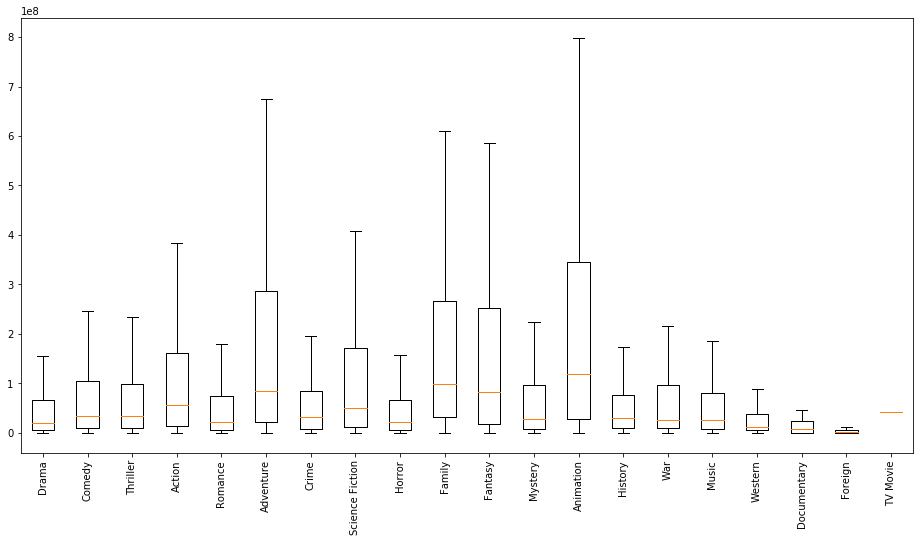

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.boxplot(revenues_por_categoria.values(), showfliers=False)
ax.set_xticklabels(revenues_por_categoria.keys(), rotation='vertical');
#plt.yscale('log')
plt.show()


#### Gráfico de barras com cada produtora com o número de filmes produzidos por ela:

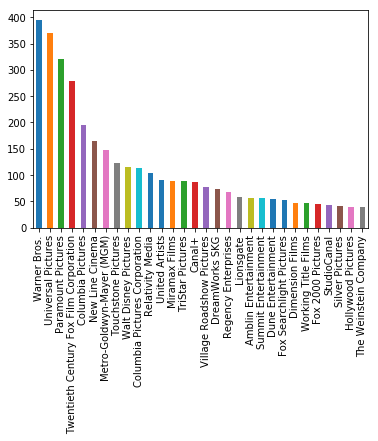

In [28]:
produtoras = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["production_companies"][e])
  #  print(data_dict)
    for palavras in data_dict:
        produtoras.append(palavras['name'])

df_produtoras = pd.DataFrame(produtoras)
df_produtoras
produtorass = df_produtoras[0].value_counts().head(30)
produtorass
produtorass.plot(kind='bar')

In [ ]:
revenues_por_produtora = {}
produtoras = [
    'Warner Bros', 'Universal Pictures', 'Paramount Pictures',
    'Twen','Romance','Adventure','Crime','Science Fiction',
    'Horror','Family','Fantasy','Mystery','Animation','History',
    "War",'Music','Western','Documentary','Foreign','TV Movie'
]

for c in categorias:
    revenues_por_categoria[c] = []

for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        cat = palavras["name"]
        if cat in revenues_por_categoria:
            revenues_por_categoria[cat].append(df_mega_clean['revenue'][e])
            
for k in revenues_por_categoria:
    revenues_por_categoria[k] = (np.array(revenues_por_categoria[k]))

### Plotando o Histograma das variáveis budget e revenue:

#### Budget:

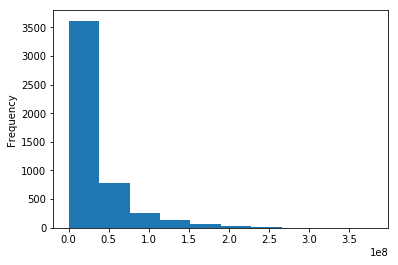

In [29]:
df_mega_clean.budget.plot.hist(density = False)

#### Revenue:

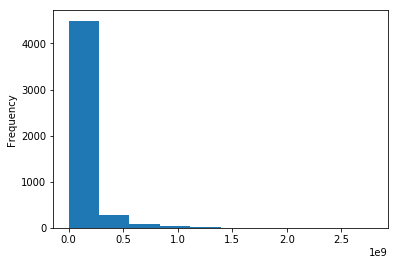

In [30]:
df_mega_clean.revenue.plot.hist(density = False)

### Juntando as duas variáveis num gráfico de dispersão:

#### Gráfico de dispersão juntando o orcçamento e a arrecadação dos filmes:

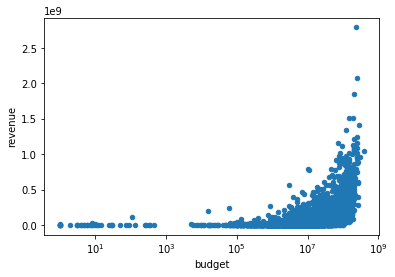

In [31]:
df_mega_clean.plot.scatter(x="budget", y = "revenue",  logx=True)

# Random Forest

# One Hot Encoder